# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [23]:
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [25]:
# a
wineDf <- read_csv("wine.csv")

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
# b
str(wineDf)

spc_tbl_ [178 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Alcohol                     : num [1:178] 14.2 13.2 13.2 14.4 13.2 ...
 $ Malicacid                   : num [1:178] 1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                         : num [1:178] 2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity_of_ash           : num [1:178] 15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                   : num [1:178] 127 100 101 113 118 112 96 121 97 98 ...
 $ Total_phenols               : num [1:178] 2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids                  : num [1:178] 3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_phenols        : num [1:178] 0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins             : num [1:178] 2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_intensity             : num [1:178] 5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hu

In [ ]:
# c
summary(wineDf[,-14])

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [27]:
# a
scaledWineDf <- wineDf %>%
  mutate(across(-class, function(x) as.numeric(scale(x))))

summary(scaledWineDf[,-14])

    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69614   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

 b answer:
 Scaling and centering the data would be important for PCA due to us now having data that is normalized and that allows us to search for directions of maximum variation without risk of variables with large magnitude throwing us off.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2798 1.5802 1.2025 0.96088 0.93177 0.81319 0.74358
Proportion of Variance 0.3821 0.1836 0.1063 0.06789 0.06383 0.04862 0.04065
Cumulative Proportion  0.3821 0.5657 0.6721 0.73995 0.80378 0.85241 0.89306
                           PC8     PC9    PC10   PC11    PC12    PC13   PC14
Standard deviation     0.59107 0.54018 0.50784 0.4752 0.41083 0.34248 0.2086
Proportion of Variance 0.02569 0.02145 0.01896 0.0166 0.01241 0.00862 0.0032
Cumulative Proportion  0.91875 0.94020 0.95916 0.9758 0.98818 0.99680 1.0000

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
PC1,-0.13955411,0.23127877,-0.000758731,0.23029309,-0.13104103,-0.37279237,-0.403237284,0.27884744,-0.29192508,0.08942632,-0.284731497,-0.36064994,-0.27641244,0.3110235281
PC2,-0.48398658,-0.22405231,-0.315929724,0.01126309,-0.30023643,-0.06640436,0.002017377,-0.02760475,-0.04056191,-0.52985700,0.278364629,0.16336820,-0.36566189,-0.0048166342
PC3,-0.20739378,0.08888012,0.626149520,0.61202482,0.13089635,0.14638031,0.150853895,0.17012772,0.14971475,-0.13728178,0.085287218,0.16612694,-0.12670975,0.0009623389
PC4,-0.05202454,0.50792619,-0.234839101,0.06750549,-0.25528136,0.19504272,0.148853644,-0.27078415,0.43527140,0.06919472,-0.436095641,0.17104798,-0.24708206,0.0785549229
PC5,0.26128775,0.09224016,0.120560926,-0.05695664,-0.75961835,0.14215523,0.107843453,0.47058669,-0.12361143,0.05497895,0.097894204,0.12525099,0.12092559,-0.1301334861
PC6,0.16536102,0.58008658,0.125924371,-0.09534441,0.10479264,-0.12544691,-0.046749718,-0.25340042,-0.49254225,-0.42598886,0.050926361,0.23652420,0.08811233,-0.1665133820
PC7,0.08109663,-0.38986636,0.161456922,0.27494282,-0.32783323,0.03482640,0.065571524,-0.60671679,-0.40687583,0.19989161,-0.205092801,0.06766169,-0.06157391,0.0523084349
PC8,0.41085968,0.07811783,-0.171511416,0.42011625,-0.15219546,-0.38223991,-0.180723075,-0.23206171,0.35471193,-0.03762399,0.463538356,-0.07290702,0.11513687,0.0521340698
PC9,-0.48056233,0.03061612,0.286299064,-0.15910053,-0.26275246,-0.35387300,-0.072503670,-0.17571862,0.24105395,-0.06894372,-0.157966956,-0.10633712,0.56477893,-0.1111169252
PC10,0.26657031,-0.32214644,-0.081445765,0.11386621,0.10095846,-0.32340394,-0.150837960,0.23033372,0.12403042,-0.24930845,-0.523691016,0.48422273,0.04337797,-0.1638009613


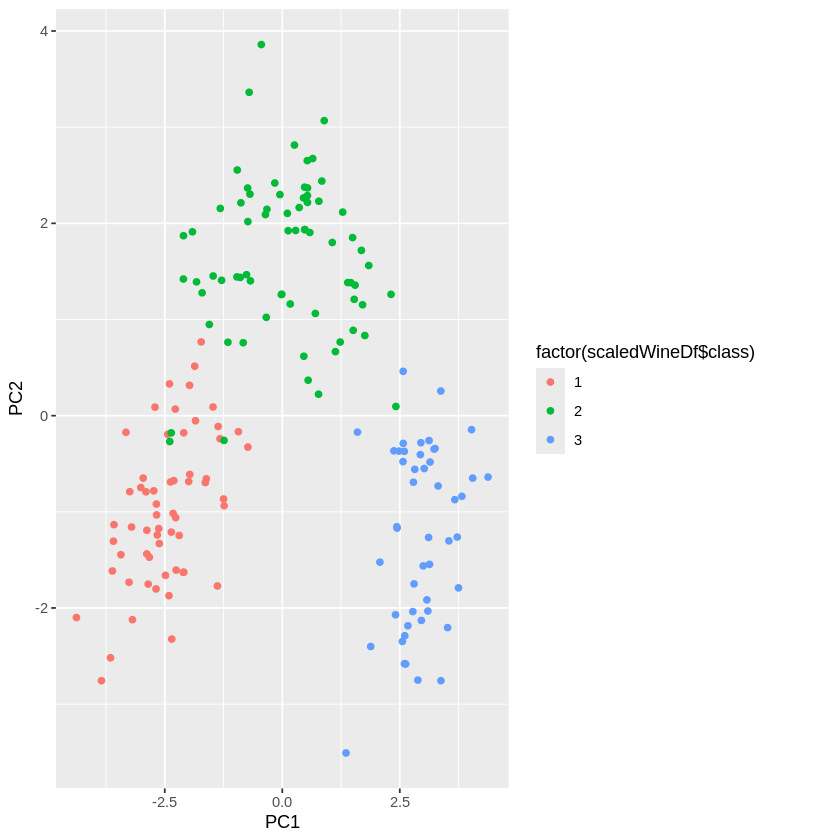

In [28]:
# a)
r <- prcomp(scaledWineDf);
# b)
summary(r)
# PC1 explains 38% of the total variance, while PC2 explains 18%
# c)
# We are doing PCA first to attempt to reduce the amount of redundant columns in our dataset
# d)
R <- solve(r$rotation);
R

# e)
ggplot(as_tibble(r$x), aes(PC1,PC2)) + geom_point(aes(color=factor(scaledWineDf$class)))

# f)
# When we plot PC1 vs PC2, we see that that wine classes are grouped up and are distinct enough to make a difference as to where they show up in the plot

# g)
# PCA would fail where the data is non-linear. For example, if there are obvious radial trends within the scatterplot of a
# dataset, we could easily see that but since PCA assume linearity within the dataset, it is not as useful right off the bat.

# h)
# A vector space is a combination of a set and a field where a specific set of axioms hold true,
# while a manifold is a a more informal definition of a vector space which also follows the set
# of axioms but only within a confined space within the vector space. For example, a sphere is a 2D
# manifold within a 3D vector space. From a 2D perspective, a sphere looks like a circle, but we know
# the sphere has depth, we just cannot see it from the manifold space.
# T-SNE is designed to work with data that may lie on a non-linear manifold. It attempts to find a
# lower-dimensional representation that preserves the local relationships between data points, even
# if the global structure is non-linear.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



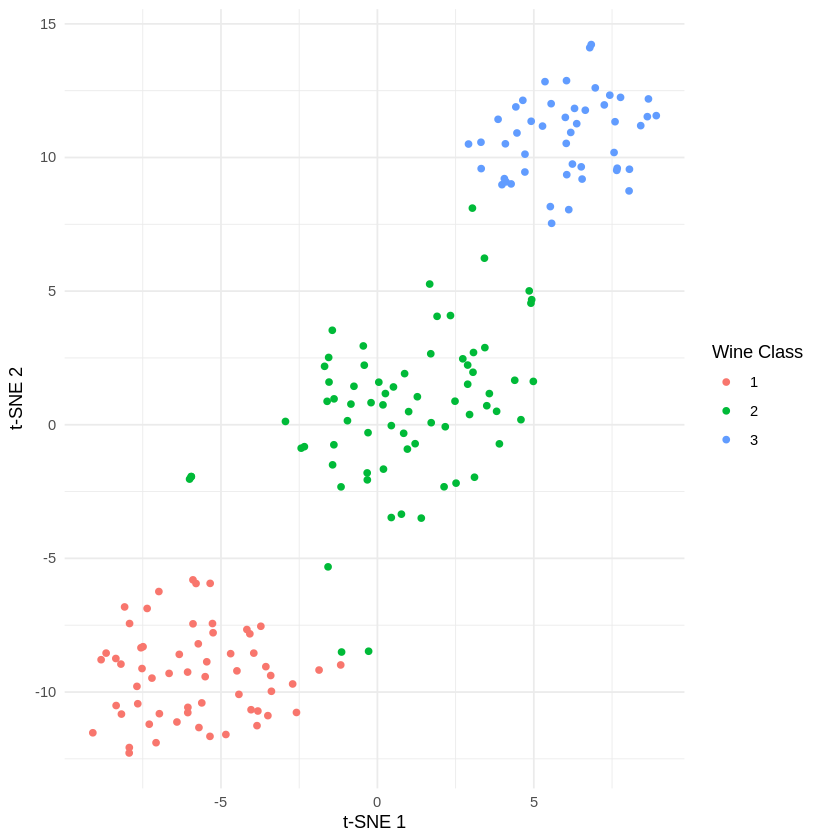

In [29]:
# a)
set.seed(123)
pcaSubset <- as_tibble(r$x)[, 1:10]
pcaSubset$class <- scaledWineDf$class
pcaSubset <- distinct(pcaSubset)

r2 <- Rtsne(pcaSubset, dims = 2, perplexity = 30, verbose = FALSE)
# b)
r2Tibble <- as_tibble(r2$Y)
colnames(r2Tibble) <- c("V1", "V2")
r2Tibble <- r2Tibble %>%
  mutate(class = pcaSubset$class)

ggplot(r2Tibble, aes(V1, V2)) +
  geom_point(aes(color = factor(class))) +
  labs(x = "t-SNE 1", y = "t-SNE 2", color = "Wine Class") +
  theme_minimal()
# c)
# We didn't stop at PCA because while PCA is good at reducing dimensionality and preserving
# global variance (assuming linearity), it might not effectively reveal non-linear structures
# or clusters in the data. T-SNE is better suited for visualizing such complex relationships
# in a lower-dimensional space by preserving local similarities between data points.

# d)
# This workflow is useful for visualizing high-dimensional data in various fields, such as
# image analysis, text analysis, and social science reserach.